Мы имеем датасет (средняя зарплата от средней стоимости дома). Изначально классов нет поэтому сначала придется классифицировать самим

Так как в дата сете рассмотрены не столько отдельные параметры одного дома дома, сколько средние параметры домов на определенной территории (насолько я понял), то описание параметров тоже будем обозначать в среднем

longitude - долгота
latitude - широта
housing_median_age - средний возраст домов
total_rooms - общая площадь
total_bedrooms - общая площадь спален
population - население
households - домохозяйства
median_income - доход
median_house_value - стоимость дома
ocean_proximity - близость до океана\залива

In [71]:
import sys
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn


In [14]:
url = "https://raw.githubusercontent.com/JohnyDab/machinelearning/main/housing.csv"
data = pd.read_csv(url)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [90]:
data.columns
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]

In [18]:
data.index

RangeIndex(start=0, stop=20640, step=1)

In [19]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
[feature for feature in data.columns if data_raw[feature].isnull().sum() > 1]

[]

In [21]:
data_raw = data.dropna()

In [22]:
data_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


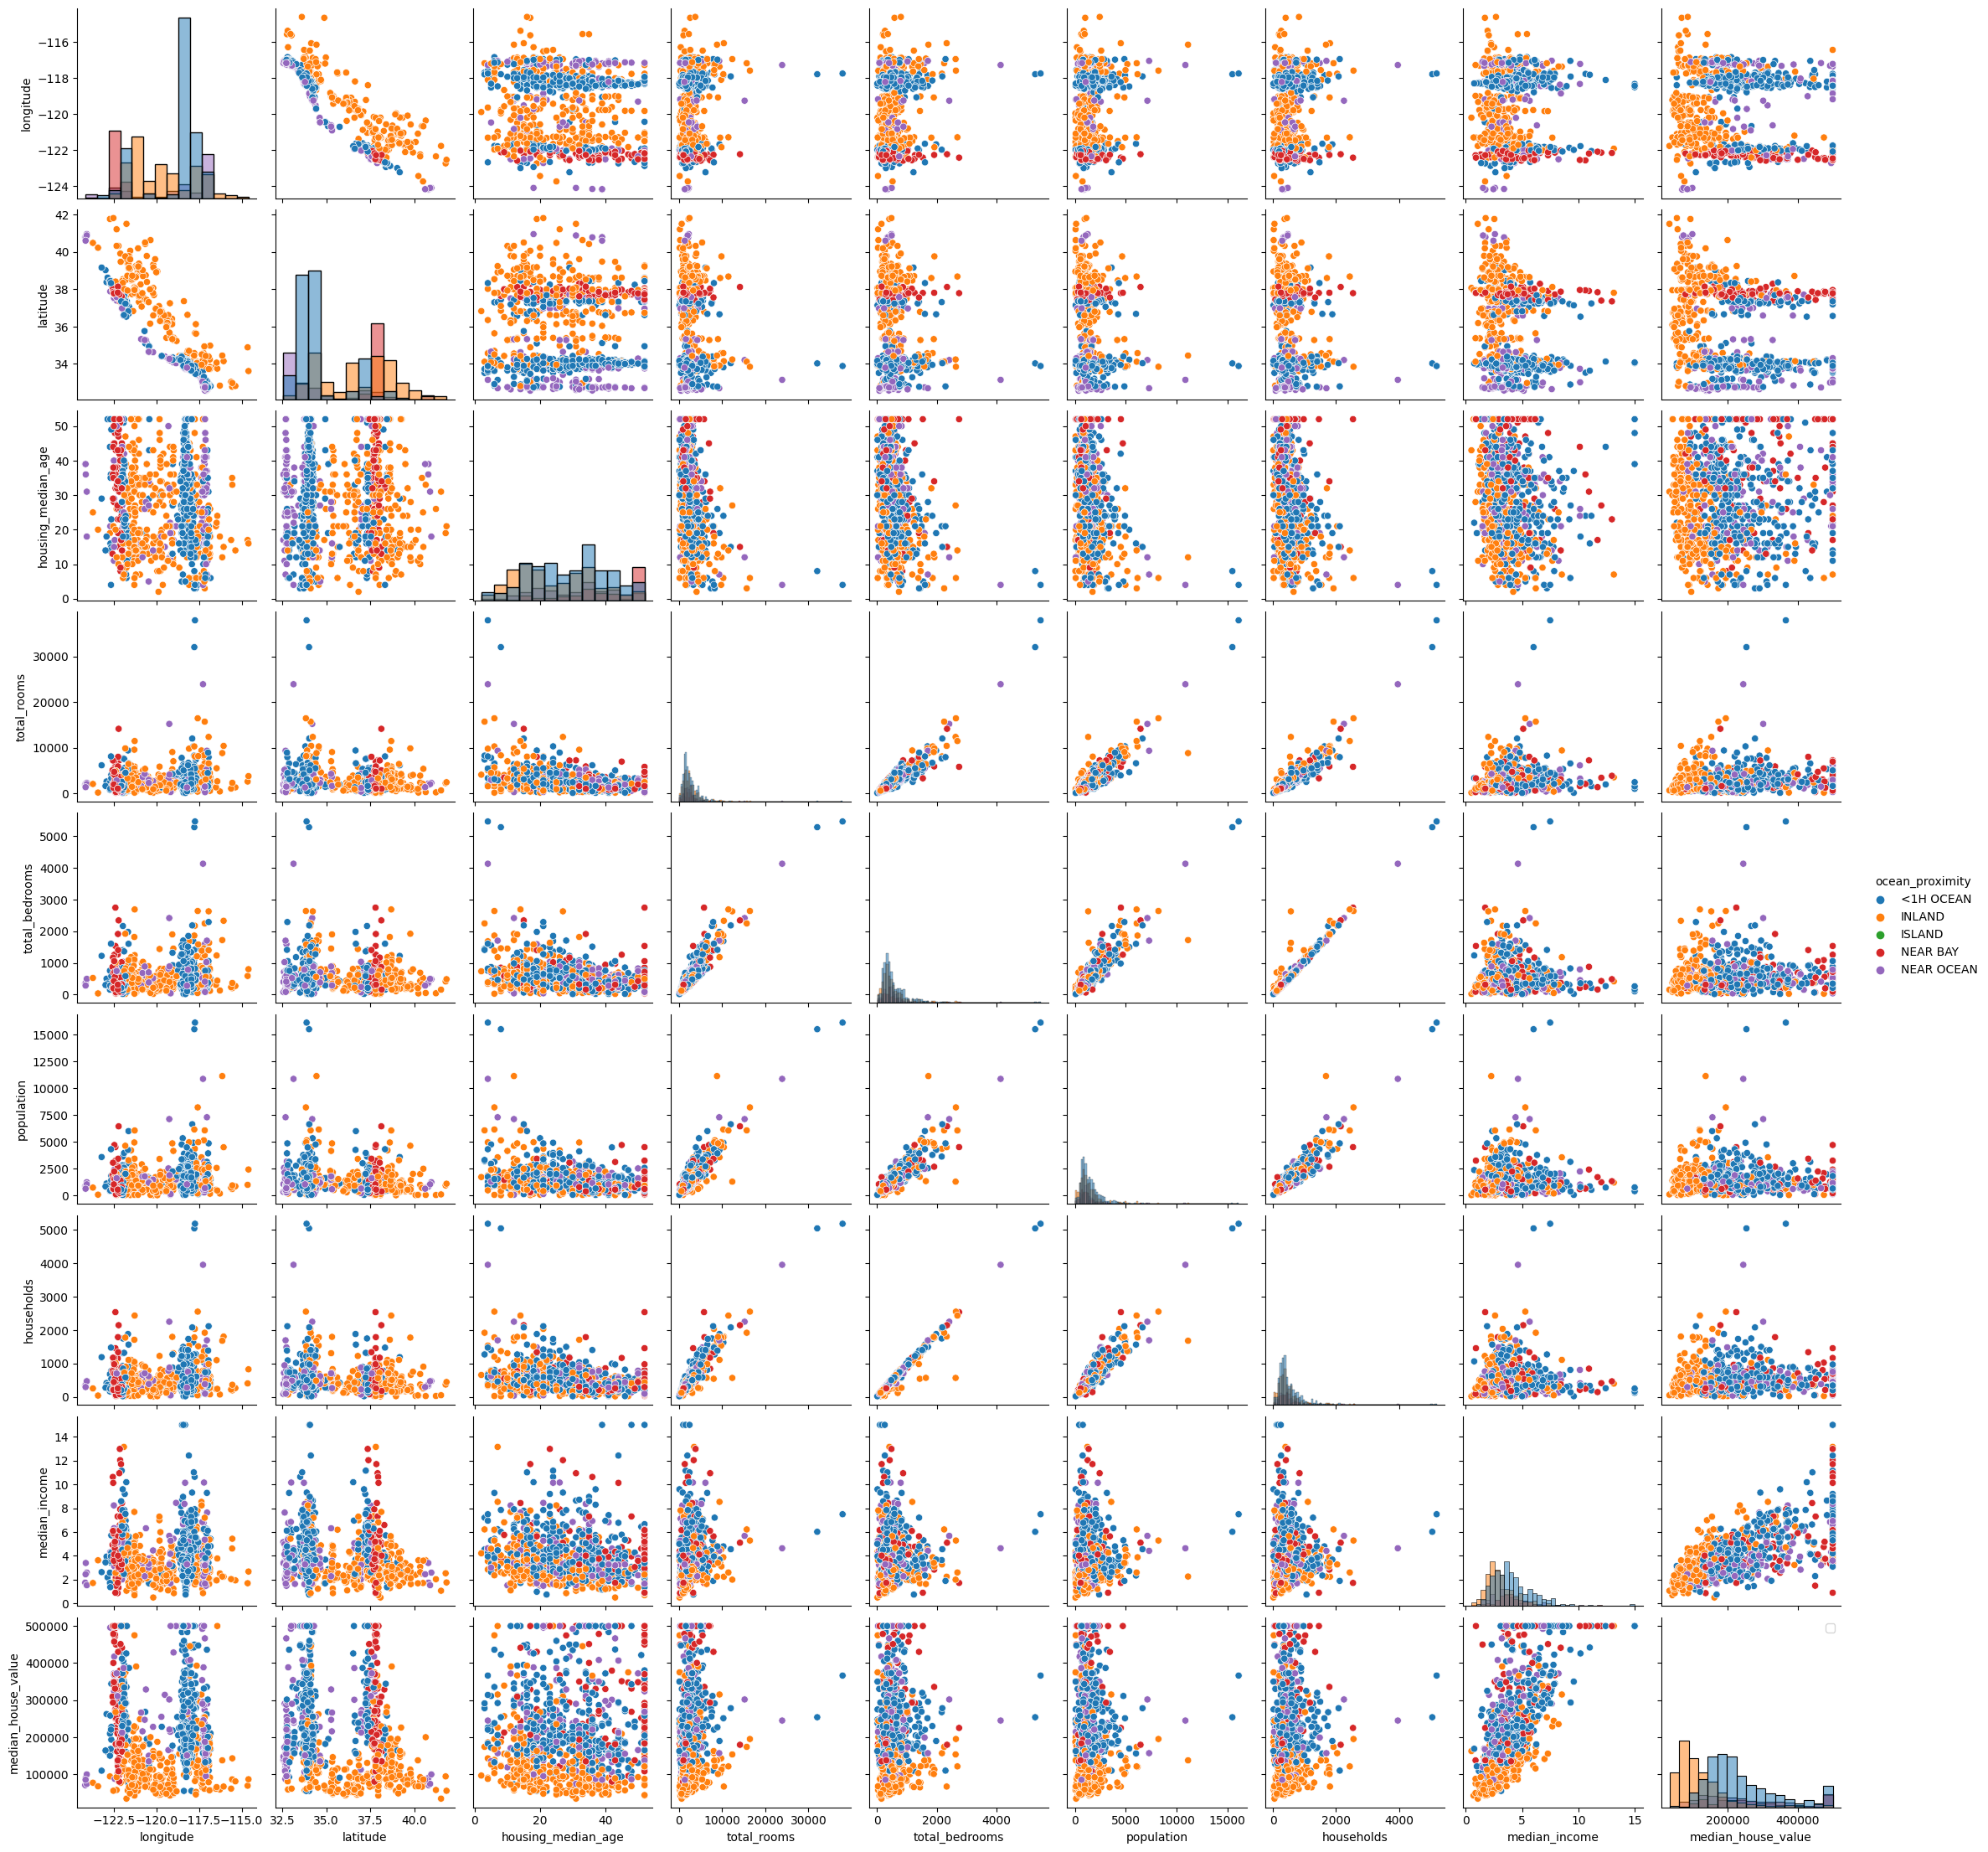

In [24]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')


random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)


sns.pairplot(data.iloc[random_subset], hue = 'ocean_proximity', diag_kind='hist')
plt.legend()

<ipython-input-25-e998ee43ef33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<Axes: >

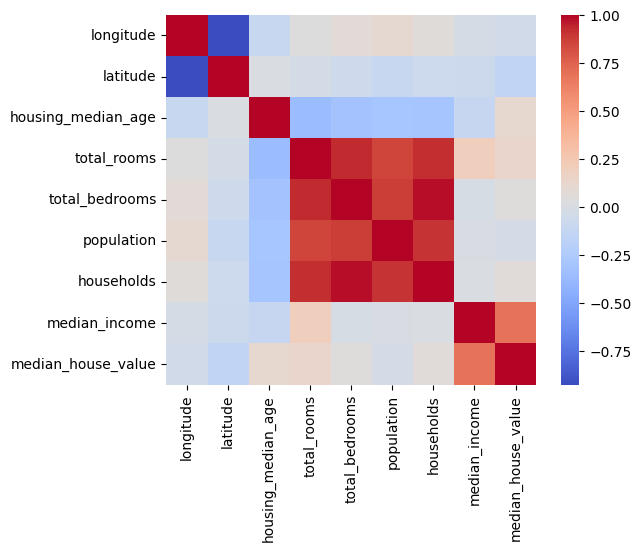

In [25]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')


Видна достаточно сильная корреляция между средним доходом и средней ценой дома.

In [26]:
corr_mat>0.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,True,False,False,False,False,False,False,False,False
latitude,False,True,False,False,False,False,False,False,False
housing_median_age,False,False,True,False,False,False,False,False,False
total_rooms,False,False,False,True,True,True,True,False,False
total_bedrooms,False,False,False,True,True,True,True,False,False
population,False,False,False,True,True,True,True,False,False
households,False,False,False,True,True,True,True,False,False
median_income,False,False,False,False,False,False,False,True,True
median_house_value,False,False,False,False,False,False,False,True,True


<Axes: xlabel='ocean_proximity', ylabel='median_income'>

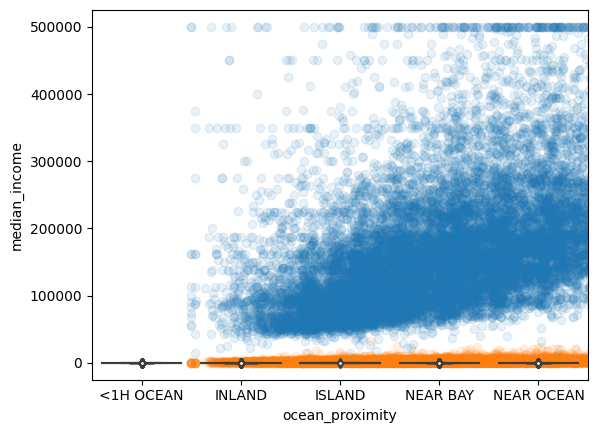

In [27]:
plt.scatter(data['median_income'], data['median_house_value'],alpha = 0.1)
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)
sns.violinplot(x="ocean_proximity", y="median_income", data=data)
sns.boxplot(x="ocean_proximity", y="median_income", data=data)

Видна небольшая зависимость от того, где дом продается, выделяются дома, которые расположены "вне досягаемости до воды". Цена на них ниже

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

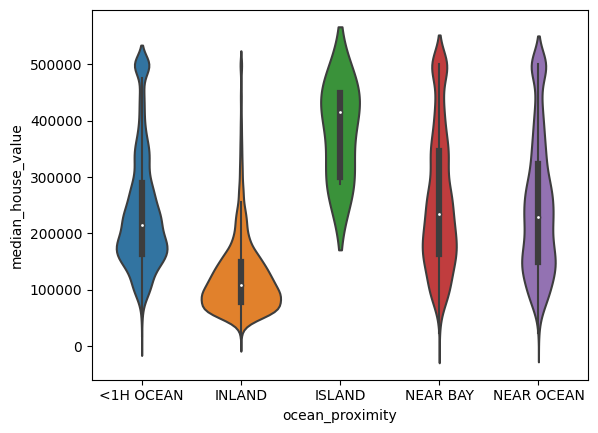

In [28]:
sns.violinplot(x="ocean_proximity", y="median_house_value", data=data)

In [29]:
data_new = data

Ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'])
data_new = pd.concat((data_new, Ocean_proximity_dummies), axis=1)

data_new = data_new.drop(['ocean_proximity'], axis=1)
data_new = data_new.drop(['longitude'], axis=1)
data_new = data_new.drop(['latitude'], axis=1)

In [30]:
tmp = data_new[data_new["INLAND"] == 1]
tmp = tmp.drop(['ISLAND'], axis=1)
tmp = tmp.drop(['NEAR BAY'], axis=1)
tmp = tmp.drop(['NEAR OCEAN'], axis=1)
tmp = tmp.drop(['<1H OCEAN'], axis=1)


In [31]:
random_subset = np.random.choice(np.arange(tmp.shape[0]), size=100, replace=False)

посмотрим о возможные корреляции

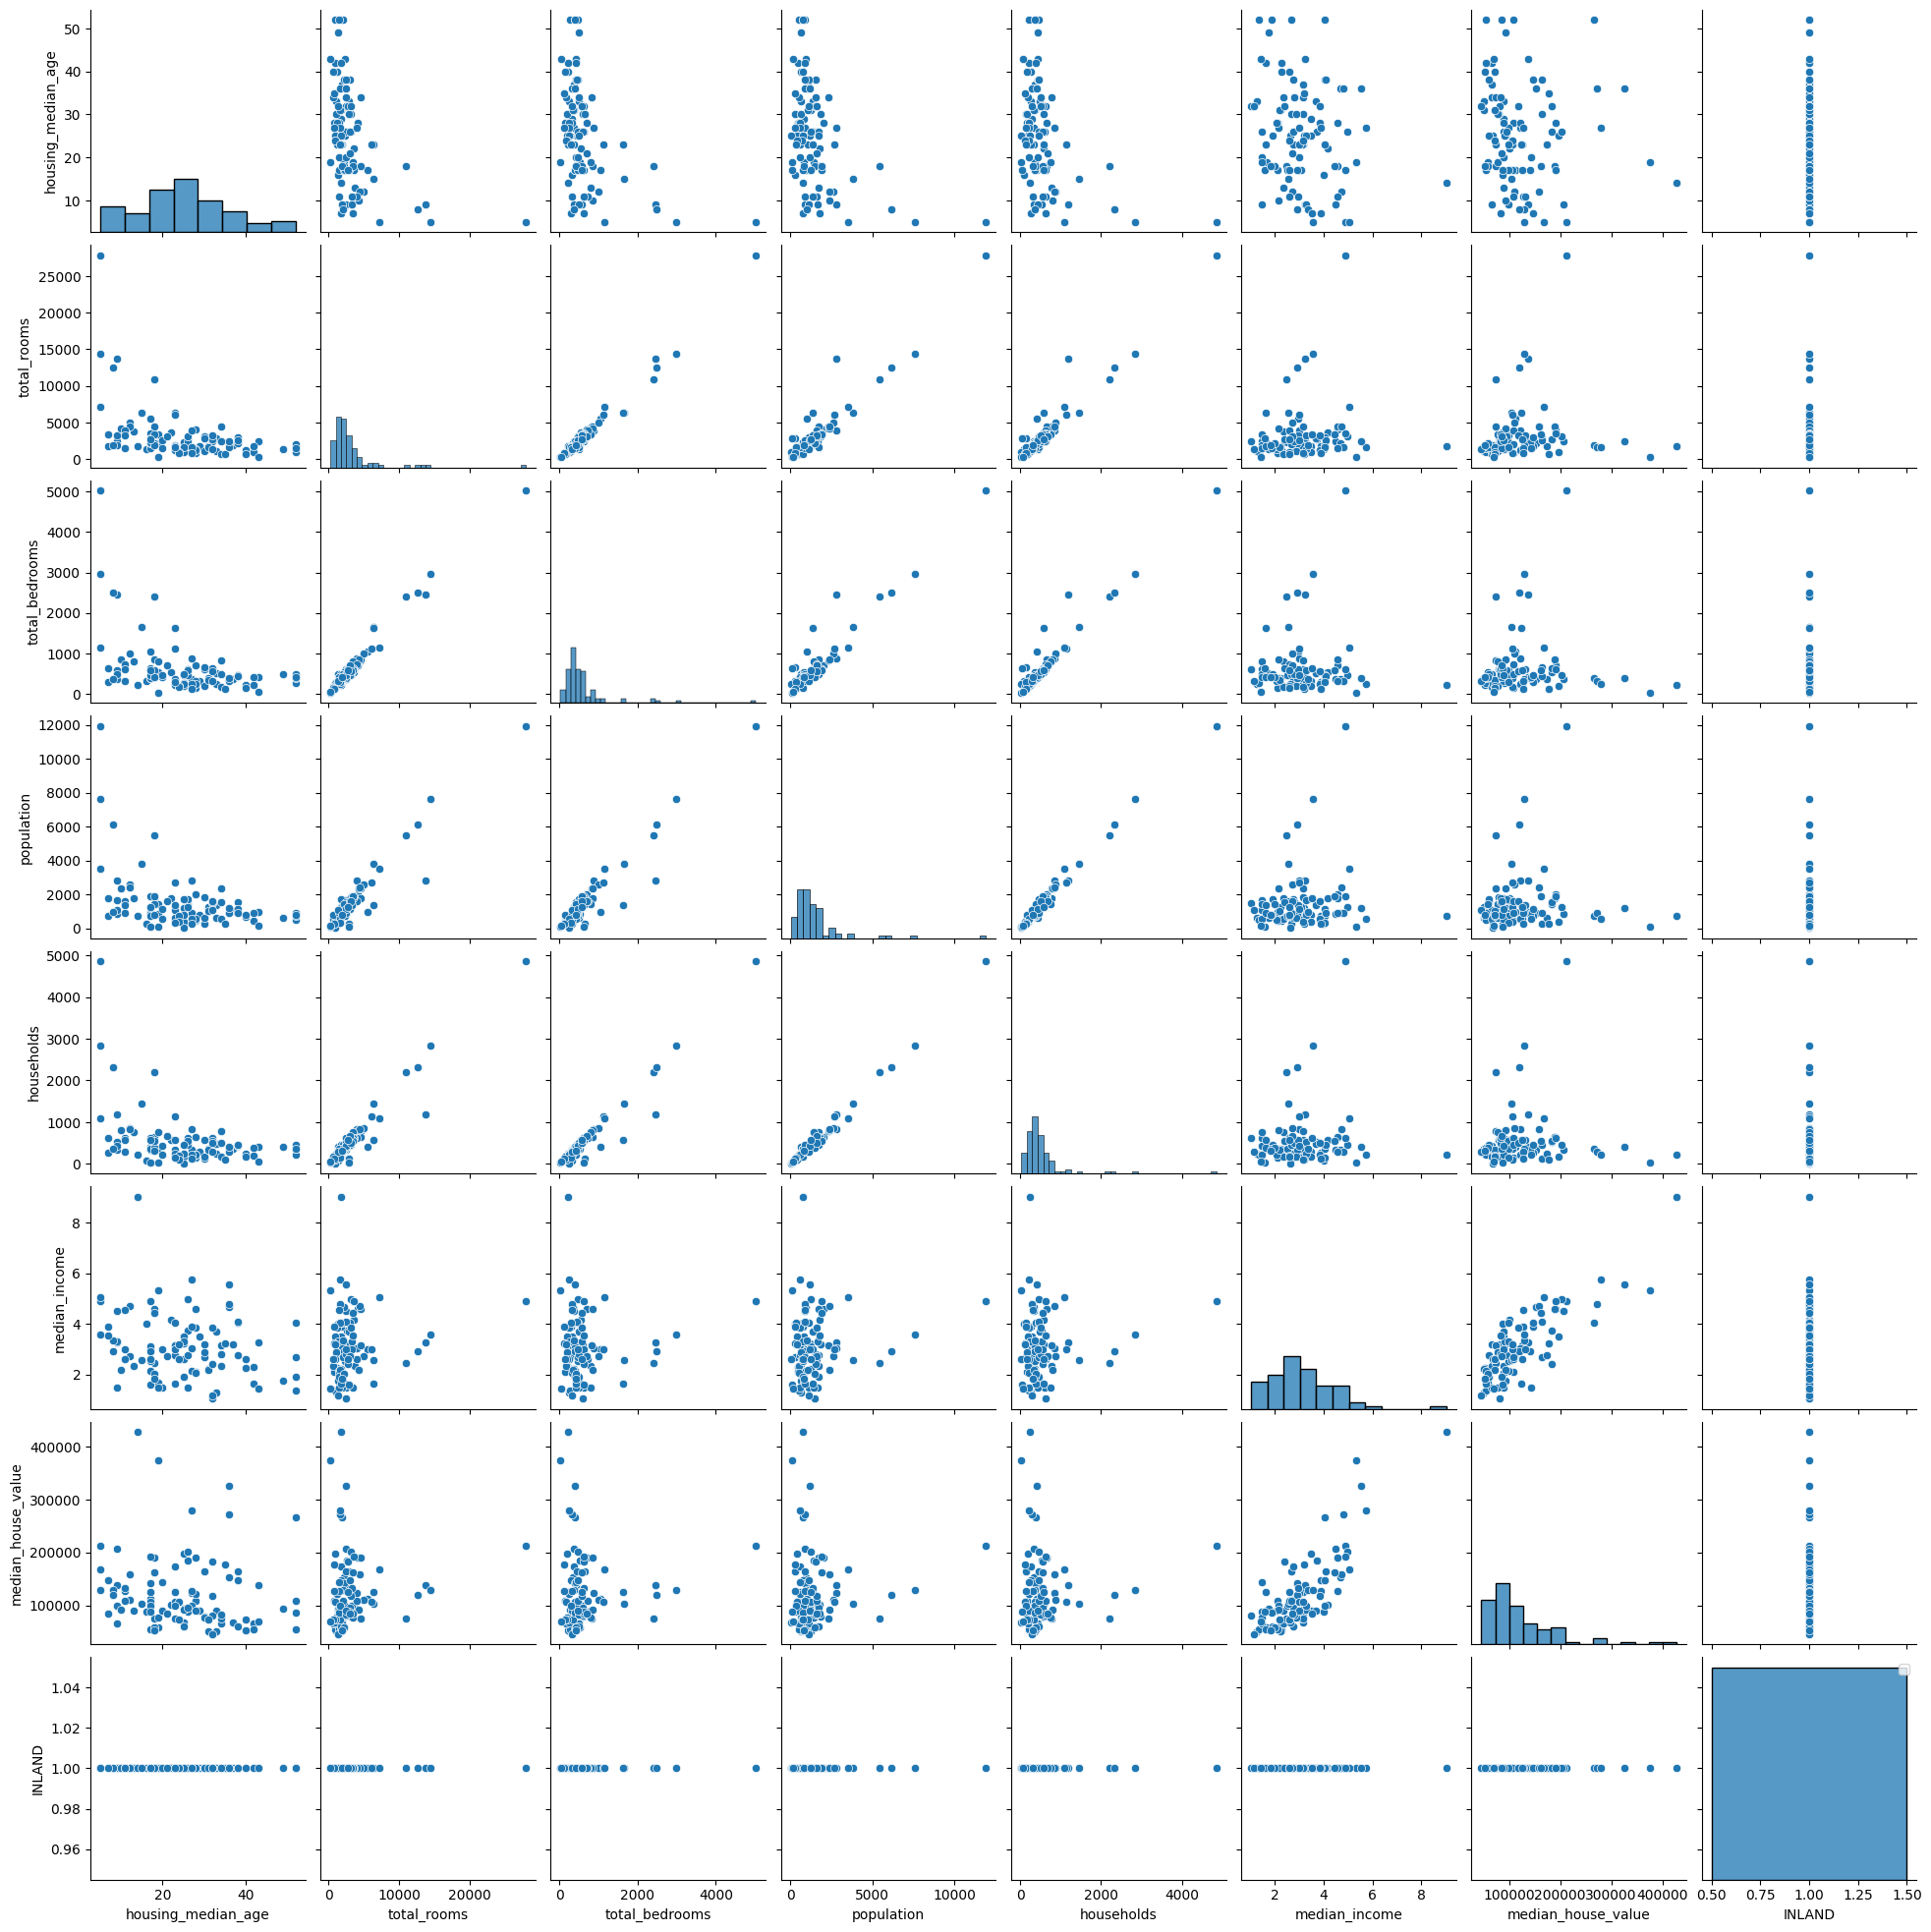

In [32]:
sns.pairplot(tmp.iloc[random_subset], diag_kind='hist')
plt.legend()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND
housing_median_age,True,False,False,False,False,False,False,False
total_rooms,False,True,True,True,True,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False
population,False,True,True,True,True,False,False,False
households,False,True,True,True,True,False,False,False
median_income,False,False,False,False,False,True,True,False
median_house_value,False,False,False,False,False,True,True,False
INLAND,False,False,False,False,False,False,False,False


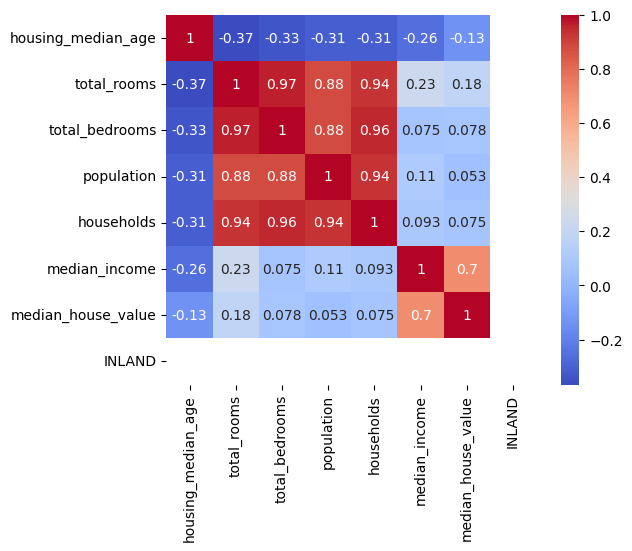

In [33]:
corr_mat = tmp.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm',annot=True)
corr_mat > 0.5


Избавляемся от пустых значений

In [34]:
data_new.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [35]:
data_new['total_bedrooms'].fillna(data_new['total_bedrooms'].mode().iloc[0], inplace=True)


In [36]:
data_new.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [37]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [38]:
data_stand.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.855658e-17,2.444212e-17,-1.046536e-16,-1.927829e-17,6.334296e-17,7.711317e-17,-1.211778e-16,-1.652425e-16,-7.160508e-17,8.262125e-18,8.262125e-18,4.406467e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.196127e+00,-1.207254e+00,-1.271944e+00,-1.256092e+00,-1.303952e+00,-1.774256e+00,-1.662601e+00,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
25%,-8.453727e-01,-5.445566e-01,-5.791750e-01,-5.637952e-01,-5.742155e-01,-6.881019e-01,-7.561450e-01,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
50%,2.864502e-02,-2.332048e-01,-2.482646e-01,-2.291262e-01,-2.368104e-01,-1.767908e-01,-2.353280e-01,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
75%,6.642943e-01,2.347971e-01,2.570285e-01,2.644885e-01,2.758360e-01,4.592952e-01,5.014851e-01,1.122111e+00,1.466479e+00,-1.556583e-02,-3.532557e-01,-3.844572e-01
max,1.856137e+00,1.681517e+01,1.406897e+01,3.024960e+01,1.460117e+01,5.858144e+00,2.540349e+00,1.122111e+00,1.466479e+00,6.424017e+01,2.830673e+00,2.600944e+00


In [39]:
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982119,-0.804800,-0.967221,-0.974405,-0.977009,2.344709,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-0.607004,2.045841,1.358675,0.861418,1.669921,2.332181,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,1.856137,-0.535733,-0.822001,-0.820757,-0.843616,1.782656,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,1.856137,-0.624199,-0.714872,-0.766010,-0.733764,0.932945,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,1.856137,-0.462393,-0.607743,-0.759828,-0.629142,-0.012881,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.383962,-0.512579,-0.443438,-1.216099,-1.115777,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.845373,-0.888682,-0.917227,-0.944382,-1.008396,-0.691576,-1.124443,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.924829,-0.174991,-0.119709,-0.369528,-0.174037,-1.142566,-0.992722,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.845373,-0.355591,-0.300639,-0.604415,-0.393743,-1.054557,-1.058583,-0.891134,1.466479,-0.015566,-0.353256,-0.384457


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
housing_median_age,True,False,False,False,False,False,True,False,False,False,True,False
total_rooms,False,True,True,True,True,True,True,False,False,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False,False,False,False,False
population,False,True,True,True,True,False,False,False,False,False,False,False
households,False,True,True,True,True,False,False,False,False,False,False,False
median_income,False,True,False,False,False,True,True,True,False,False,False,False
median_house_value,True,True,False,False,False,True,True,True,False,False,True,True
<1H OCEAN,False,False,False,False,False,True,True,True,False,False,False,False
INLAND,False,False,False,False,False,False,False,False,True,False,False,False
ISLAND,False,False,False,False,False,False,False,False,False,True,False,False


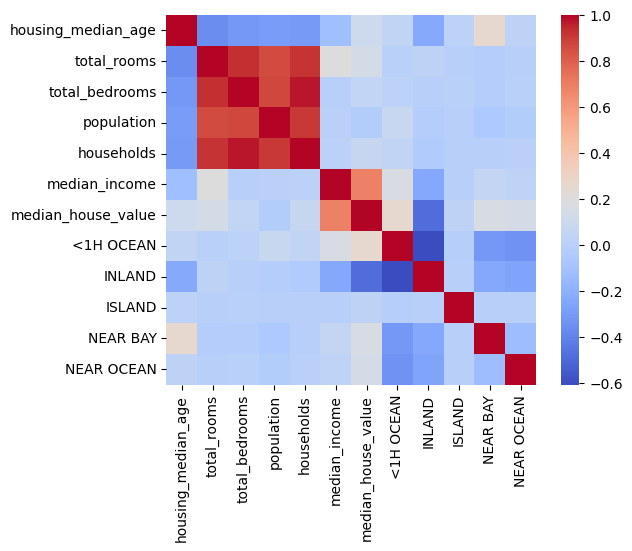

In [40]:
corr_mat = data_stand.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
corr_mat > 0.1

In [43]:
X = data_stand.drop(['median_income'], axis=1)
y = data_new['median_income']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test


(15480, 5160)

In [45]:

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [47]:
lr_model.coef_

array([-2.80756533e-01,  1.99976504e+00, -2.21256674e+00,  4.04245480e-02,
        1.54852518e-01,  1.16936758e+00,  4.40603781e-02,  1.40514527e-03,
       -2.97581859e-02,  7.89119608e-03, -7.33054288e-02])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1.2194649600109246,
 1.4449275207766266,
 0.6635192839649526,
 0.5945047783797089)

In [49]:
lr_model.score(X_train, y_train)

0.6635192839649526

In [50]:
for i in range(len(data_stand)):
  if data_stand['median_income'][i]>0:
    data_stand['median_income'][i] = 1
  else :
    data_stand['median_income'][i] = 0
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982119,-0.804800,-0.967221,-0.974405,-0.977009,1.0,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-0.607004,2.045841,1.358675,0.861418,1.669921,1.0,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,1.856137,-0.535733,-0.822001,-0.820757,-0.843616,1.0,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,1.856137,-0.624199,-0.714872,-0.766010,-0.733764,1.0,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,1.856137,-0.462393,-0.607743,-0.759828,-0.629142,0.0,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.383962,-0.512579,-0.443438,0.0,-1.115777,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.845373,-0.888682,-0.917227,-0.944382,-1.008396,0.0,-1.124443,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.924829,-0.174991,-0.119709,-0.369528,-0.174037,0.0,-0.992722,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.845373,-0.355591,-0.300639,-0.604415,-0.393743,0.0,-1.058583,-0.891134,1.466479,-0.015566,-0.353256,-0.384457


Классифицируем значения с помощью к ближайших

In [51]:
y = data_stand['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

y_train

from sklearn.neighbors import KNeighborsClassifier


In [80]:
k_neigh = KNeighborsClassifier(n_neighbors=2)
k_neigh.fit(X_train,y_train)

y_test_predict = k_neigh.predict(X_test)
y_train_predict = k_neigh.predict(X_train)


In [53]:
err_test  = np.mean(y_test  != pred_test)
err_test

0.1996124031007752

Не хорошо. Попробуем найти оптимальный параметр для k ближайших

In [67]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 12, 15, 20, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1681524547803619 20


Лучшее количество соседей равно 12, выведем ошибки на train и на test:

In [68]:
knn2 = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train2 = np.mean(y_train != knn2.predict(X_train))
err_test2  = np.mean(y_test  != knn2.predict(X_test))

print(err_train2, err_test2)

0.1507751937984496 0.17325581395348838


Видим небольшое ухудшение до 4.4% на обучающей выборке и небольшое улучшение до 6.2% на тестовой выборке.

Для лучшего понимания эффективности метода построим confusion matrix:

[[2605  419]
 [ 475 1661]]


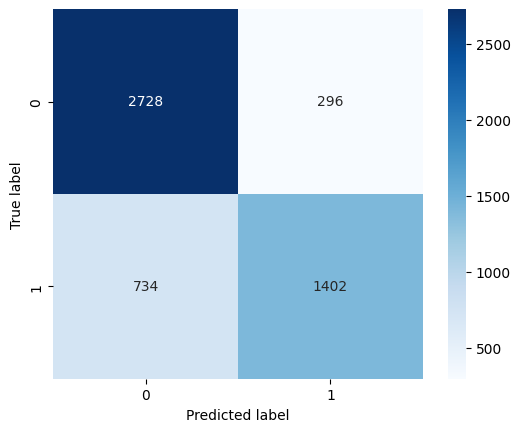

In [81]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_test_predict), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,knn2.predict(X_test)))

ВЫВОД
Применив KNN получаем неплохую точность, отсутствие переобучения и недообучения, что довольно неплохо, несмотря на то что модель не очень хорошо справляется с предсказанием наличия инсульта(на это, скорее всего влияет несбалансированность классов).

SCV

In [82]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.12887596899224807 0.14069767441860465


[[2684  340]
 [ 386 1750]]


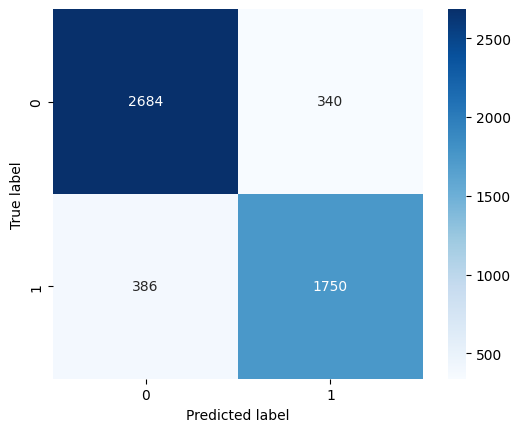

In [83]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,svc.predict(X_test)))


При использовании машины опорных векторов ошибка на тесте не особо уменьшилась, при построении confusion matrix видно, что лучше чем в KNN предсказывается отсутствие инсульта, но также не определяется его наличие

RANDOM FOREST

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

[[2695  329]
 [ 416 1720]]


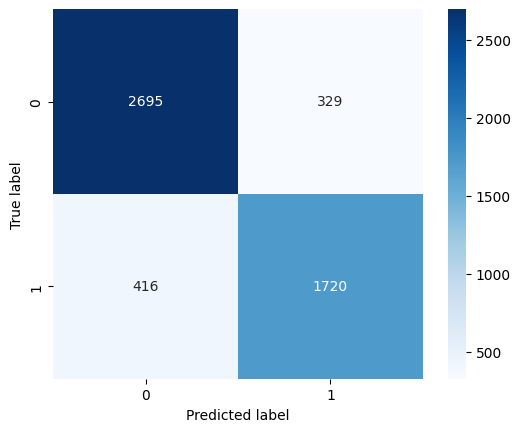

In [95]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, rfc.predict(X_test)))

In [96]:
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))

print(err_train, err_test)

0.0 0.14437984496124032


Случайный лес сумел один раз правильно предсказать наличие инсульта, в отличие от KNN и SVC, хотя всё ещё в этом плане уступает XGBOOST, хотя ошибка на тесте в данном случае ниже. Ошибка на тесте нулевая, что может, опять же, свидетельствовать о переобучении.

ЧАСТЬ 2


ЛОГИЧЕСКАЯ РЕГРЕССИЯ

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.14244186046511628 0.1496124031007752


[[2681  343]
 [ 429 1707]]


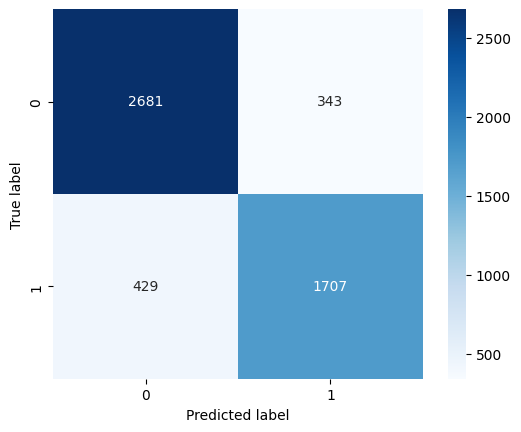

In [98]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, model.predict(X_test)))

Метод справляется хуже всех предыдущих

НЕЙРОННАЯ СЕТЬ

In [99]:
from sklearn.neural_network import MLPClassifier
network = MLPClassifier(hidden_layer_sizes = (100, 50), random_state = 42)
network.fit(X_train, y_train)

y_train_pred = network.predict(X_train)
y_test_pred = network.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.11253229974160207 0.13643410852713178


[[2679  345]
 [ 359 1777]]


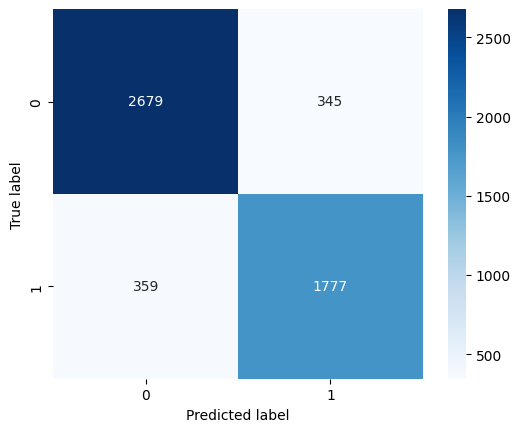

In [100]:
sns.heatmap(confusion_matrix(y_test, network.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, network.predict(X_test)))

Метод, судя по ошибкам на обучающей и тестовой выборке, справляется хорошо, уступая лишь Random Forest.

ПОДБОР ГИПЕРПАРАМЕТРА

In [101]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (100, 50), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

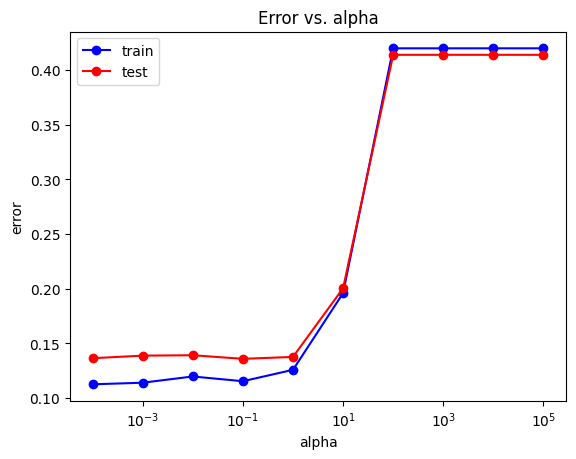

In [102]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
#plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [103]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11253229974160207 0.1358527131782946


In [104]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1]


In [105]:
alpha_opt = alpha_opt[0]

In [106]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), random_state = 42, alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.11537467700258398
0.1358527131782946


[[2679  345]
 [ 359 1777]]


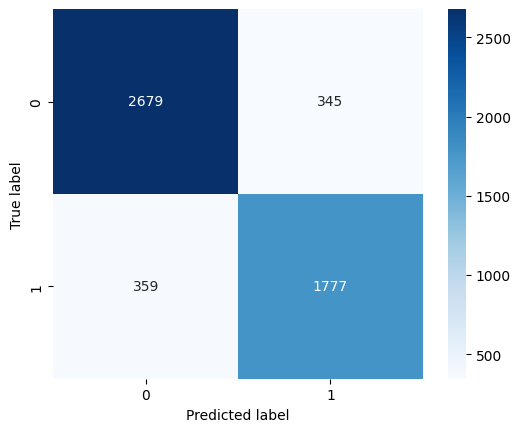

In [107]:
sns.heatmap(confusion_matrix(y_test, network.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, network.predict(X_test)))

В результате подбора гиперпараметра видим малое уменьшение ошибки, модель всё ещё уступает Random Forest

ВЫВОД


Лучше всего себя показал Random Forest, хоть на нем и наблюдается некоторое переобучение, он всё ещё даёт наименьшую ошибку на тестовых данных.